In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_s = 101

In [ ]:

# From Google Drive

import gdown # for google drive



file_id = '1B99f3nG0j1EWCYQ8E2nx6hWxBFTt6YFE'
destination = 'creditcard_reduced.csv'
gdrive_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(gdrive_url, destination, quiet=False)

df = pd.read_csv(destination)
df.tail(3)

Downloading...
From: https://drive.google.com/uc?id=1B99f3nG0j1EWCYQ8E2nx6hWxBFTt6YFE
To: /content/creditcard_reduced.csv
100%|██████████| 3.77M/3.77M [00:00<00:00, 154MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10489,10490,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
10490,10491,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
10491,10492,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
# Use Annual Income & Spending Score

reduced_df = df.drop(['Time', 'Amount', 'Class'], axis = 1)
reduced_df.tail(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
10489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
10490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700
10491,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309


In [ ]:
# Calculate the correlation matrix

correlation_matrix = reduced_df.corr()
correlation_matrix.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
V1,1.000000,-0.498196,0.595183,-0.309901,0.447117,0.161187,0.615101,0.036047,0.299357,0.442967,...,-0.136346,-0.137679,-0.076606,-0.051526,-0.085175,-0.013451,0.126746,0.054035,0.030509,0.080291
V2,-0.498196,1.000000,-0.580667,0.351316,-0.474451,-0.089933,-0.488760,-0.087224,-0.376108,-0.416450,...,0.092469,0.160798,0.117591,-0.062276,0.102402,-0.025418,-0.082594,-0.079277,-0.062501,-0.020581
V3,0.595183,-0.580667,1.000000,-0.461407,0.587559,0.151885,0.753914,-0.119742,0.538156,0.704835,...,-0.201024,-0.194674,-0.040817,0.052108,-0.031142,0.023050,-0.100964,0.055850,0.001613,-0.003968


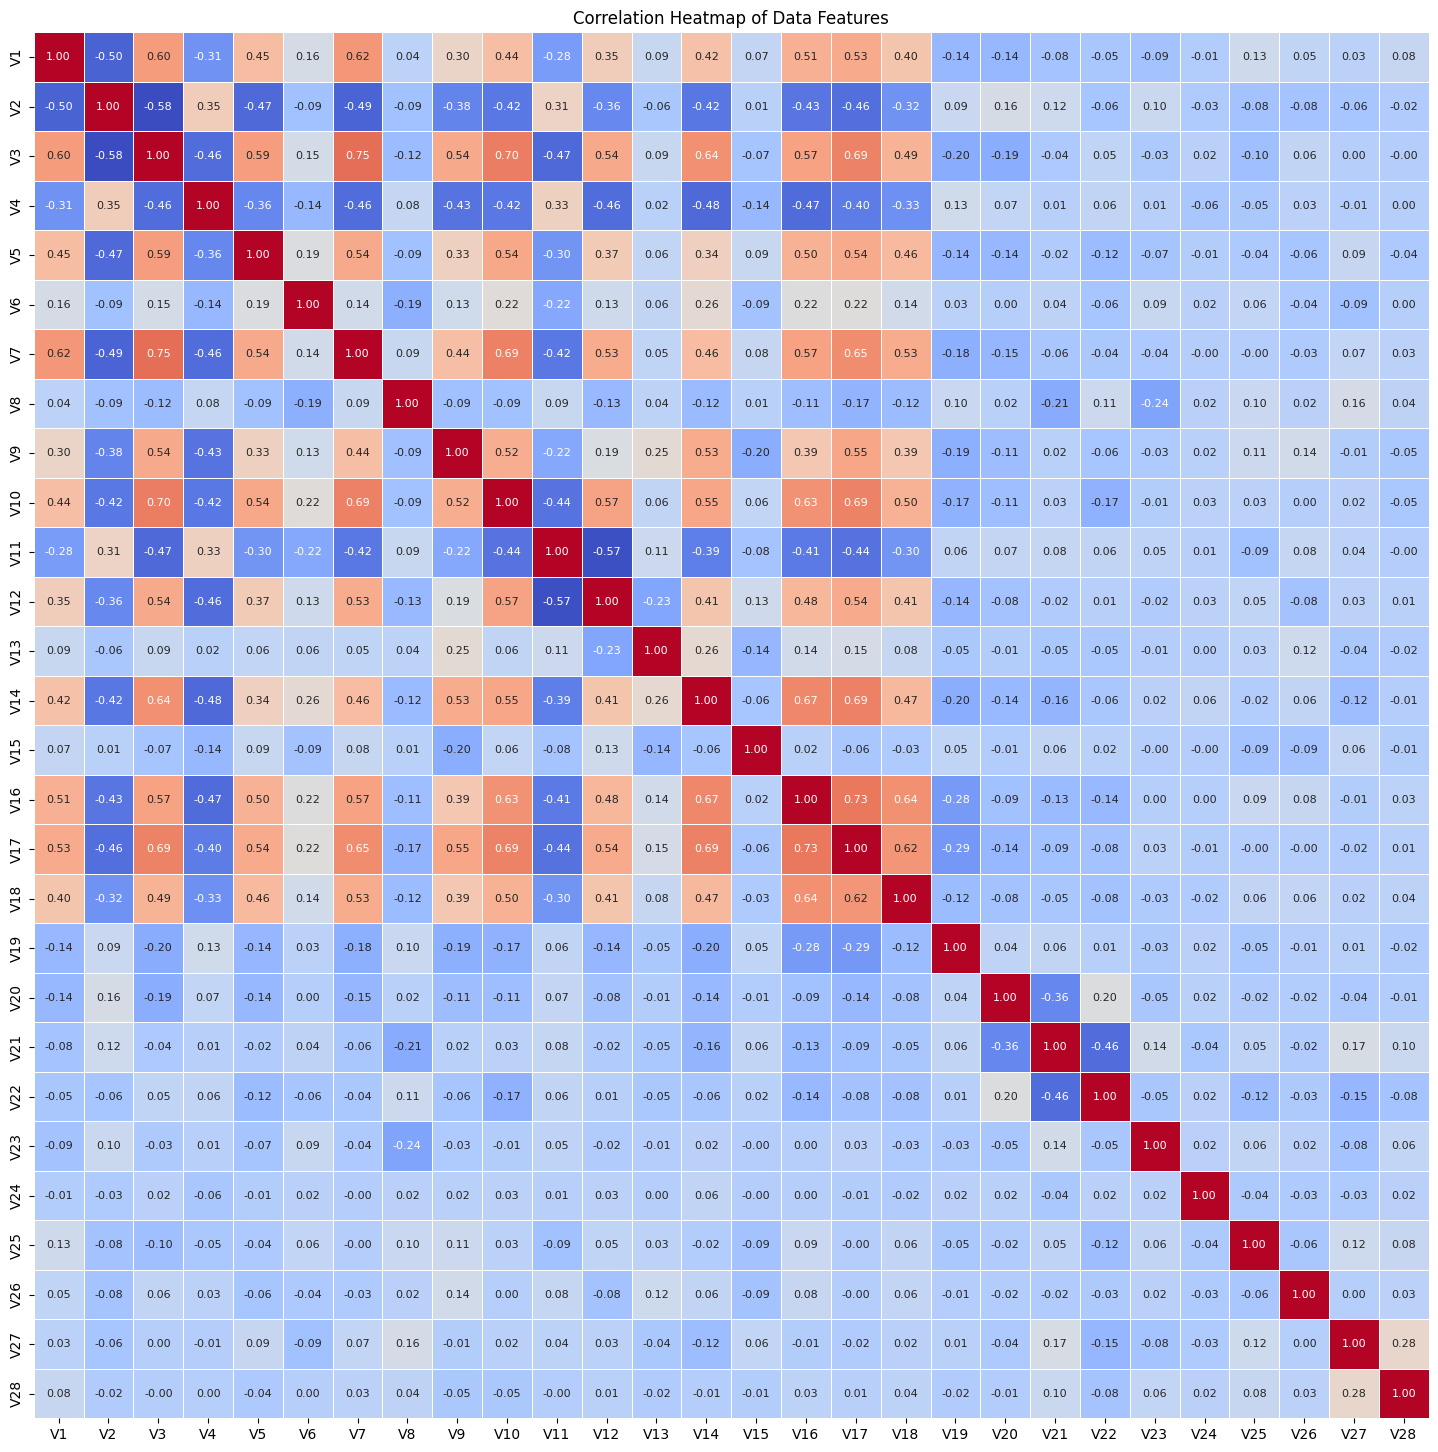

In [ ]:
# Correlation in seaborns's heatmap (No highly correlated variables)

plt.figure(figsize = (18,18))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = '.2f', annot_kws={"size": 8}, cbar = False)
plt.title("Correlation Heatmap of Data Features")
plt.show()

In [ ]:
# If our threshold is set at 0.70 above
# Find Pairs with highest correlation

correlation_pairs = correlation_matrix[correlation_matrix < 1]
correlation_pairs.unstack().drop_duplicates().sort_values(ascending = False).head(5)

# Remove V7, V17, V10

,,0
V3,V7,0.753914
V16,V17,0.728315
V3,V10,0.704835
V14,V17,0.694885
V7,V10,0.692224


In [ ]:
# DROP V7, V17, V10

# Use Annual Income & Spending Score

reduced_df_final = reduced_df.drop(['V7', 'V17', 'V10'], axis = 1)
reduced_df_final.tail(3)

,V1,V2,V3,V4,V5,V6,V8,V9,V11,V12,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
10489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,1.210158,-0.652250,1.794969,-2.775022,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
10490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,1.058733,-1.632333,1.933520,-5.030465,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700
10491,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,-0.068384,0.577829,0.491140,0.728903,...,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309


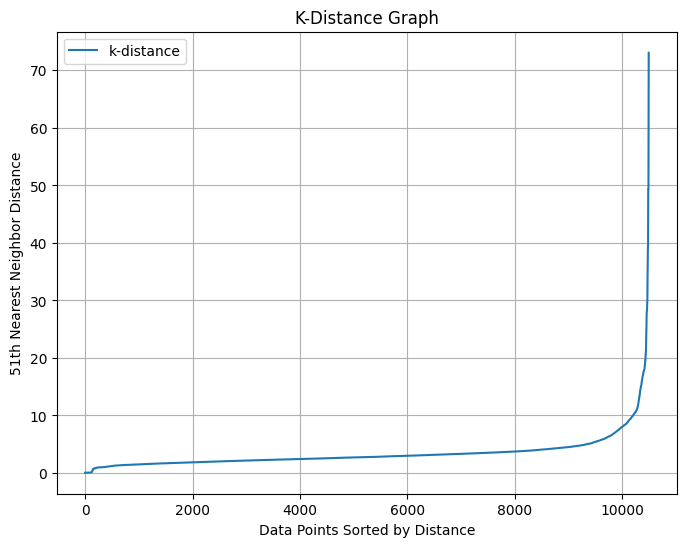

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Compute the K-Nearest Neighbors distances for k = min_samples
# min_samples = X (From 2 dimensions or two variables multiplied by 2)

min_samples = 51

neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors_fit = neighbors.fit(reduced_df)

distances, indices = neighbors_fit.kneighbors(reduced_df)

# Sort the distances (use the k-th nearest neighbor distance for each point)

k_distances = np.sort(distances[:,-1])

# Plot the k-distance graph

plt.figure(figsize = (8,6), facecolor = 'white')
plt.plot(k_distances, label = 'k-distance')
plt.title('K-Distance Graph')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.grid(True)
# plt.axhline(y = n, color = 'r', linestyle = '--', label = 'eps = n')
plt.legend()
plt.show()

In [ ]:
# Looking at the values

# Remember the number of nearest neighbor is set to n, n_neighbors = min_samples = n
# A matrix where each row contains the distances from a given data point to its k nearest neighbors

distances[:3,:]

array([[5.96046448e-08, 1.48752951e+00, 1.48925706e+00, 1.68511067e+00,
        1.92780191e+00, 1.96045546e+00, 1.99758429e+00, 2.10098701e+00,
        2.15170605e+00, 2.25228627e+00, 2.26386240e+00, 2.27141823e+00,
        2.37582381e+00, 2.43948247e+00, 2.49307467e+00, 2.49579679e+00,
        2.50063928e+00, 2.50139007e+00, 2.54511030e+00, 2.54909679e+00,
        2.58674922e+00, 2.60521778e+00, 2.61886741e+00, 2.62435927e+00,
        2.63492097e+00, 2.63958273e+00, 2.65455536e+00, 2.65771305e+00,
        2.65790151e+00, 2.66472493e+00, 2.67000540e+00, 2.68194459e+00,
        2.70334225e+00, 2.70402745e+00, 2.71315144e+00, 2.72357723e+00,
        2.72552244e+00, 2.74839381e+00, 2.75187085e+00, 2.76565501e+00,
        2.76901743e+00, 2.78024238e+00, 2.78726347e+00, 2.79667812e+00,
        2.79818196e+00, 2.79928372e+00, 2.79929600e+00, 2.80430980e+00,
        2.84632715e+00, 2.85180955e+00, 2.85317608e+00],
       [0.00000000e+00, 2.48457911e-01, 5.28695299e-01, 8.26755578e-01,
       

In [ ]:
# This will take time (a lot)

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Define range of potential eps values based on the k-distance plot

eps_values = np.arange(1, 51)

# Store S-Scores
s_scores = []

# Evaluate DBScan for each eps_values and calculate S-Score

for eps in eps_values:

  dbscan = DBSCAN(eps = eps, min_samples = min_samples)  # DBSCAN
  labels = dbscan.fit_predict(reduced_df_final)

  # Check if the clustering has more than 1 cluster to calculate S-Score
  if len(set(labels)) > 1:

    score = silhouette_score(reduced_df_final, labels)

  else:

    score = -1  # Invalid clustering scenario

  s_scores.append(score)

In [ ]:
# Look at s_scores
s_scores

[-0.19462093898224583,
 -0.13232765493364845,
 0.12768017994997458,
 0.1995337561667243,
 0.6401503134070323,
 0.7015937430425901,
 0.746946781678758,
 0.7842110940544926,
 0.798701638967101,
 0.8104851875422561,
 0.8142802957161516,
 0.8209392150005747,
 0.8320705434693565,
 0.8380704326495176,
 0.8434386871875331,
 0.8517736884613447,
 0.8595904567856146,
 0.8599193837646625,
 0.8615669667207179,
 0.8639991564927175,
 0.8639991564927175,
 0.8659835364438017,
 0.8668137561190968,
 0.8668137561190968,
 0.8695918153578456,
 0.8695918153578456,
 0.8695918153578456,
 0.8794436822668276,
 0.8794436822668276,
 0.8809816040178069,
 0.8809816040178069,
 0.8809816040178069,
 0.8809816040178069,
 0.8900371268382731,
 0.8900371268382731,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 0.8846741712163866,
 -1,
 -1,
 -1,
 -1]

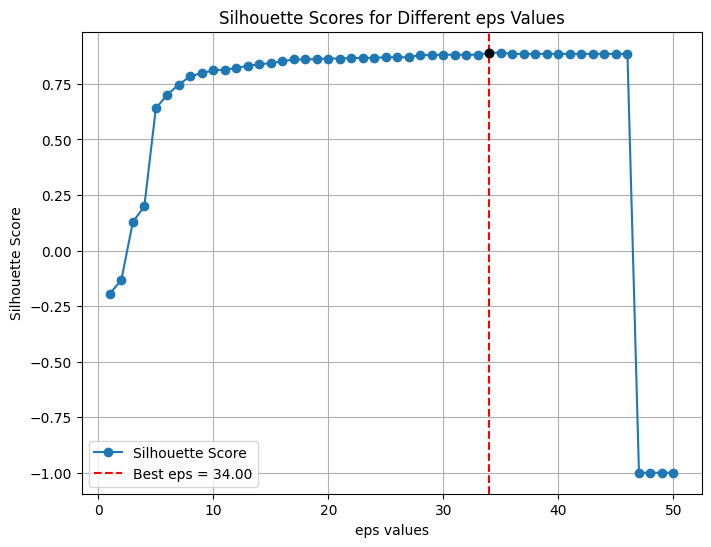

In [ ]:
# Plot the S-Scores

# Plot the Silhouette Scores for different eps values

plt.figure(figsize=(8, 6))

# Plot silhouette scores for each eps value

plt.plot(eps_values, s_scores, marker='o', label='Silhouette Score')

# Add labels and title

plt.title('Silhouette Scores for Different eps Values')
plt.xlabel('eps values')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Highlight the best eps

best_eps_index = np.argmax(s_scores) # find the index of the best s_score
best_eps = eps_values[best_eps_index] # this will be n
best_s_score = s_scores[best_eps_index] # this will be n

plt.axvline(x = best_eps, color='r', linestyle='--', label = f'Best eps = {best_eps:.2f}')
plt.scatter(best_eps, best_s_score, color='black', zorder = 5)
plt.legend()
plt.show()

In [ ]:
# Define DBSCAN model with eps= n and min_samples = n

final_model = DBSCAN(eps = 31, min_samples = 51)

# Fit the model to the scaled dataset

clusters = final_model.fit_predict(reduced_df_final)

# Add the cluster labels to the scaled DataFrame

reduced_df_final['Cluster'] = clusters
reduced_df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752


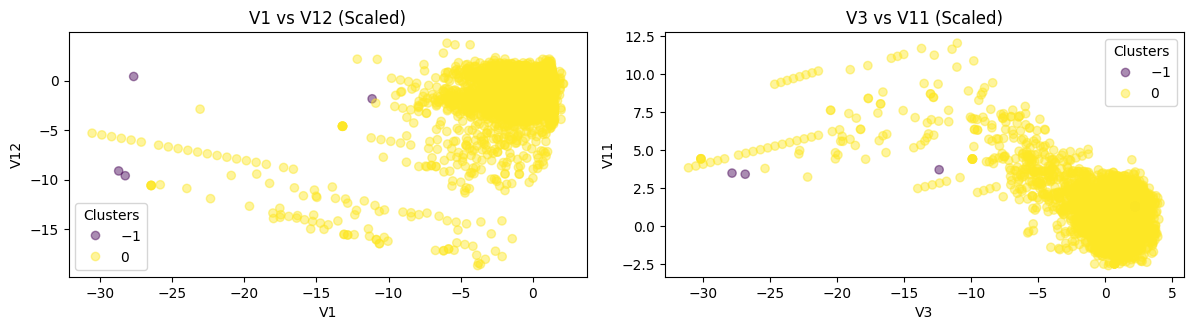

In [ ]:
# Plotting the clusters

# Define pairs of features to visualize

feature_pairs = [

    ('V1', 'V12'),
    ('V3', 'V11')

]

# Visualize the clusters in pairwise plots for the scaled data with individual legends for each plot

plt.figure(figsize=(18, 6))

for i, (feature_x, feature_y) in enumerate(feature_pairs, 1):

    plt.subplot(2, 3, i)

    scatter = plt.scatter(reduced_df_final[feature_x], reduced_df_final[feature_y],
                          c = reduced_df_final['Cluster'], marker = 'o', alpha = 0.45)

    plt.title(f'{feature_x} vs {feature_y} (Scaled)')

    plt.xlabel(feature_x)
    plt.ylabel(feature_y)

    # Add a legend to each subplot
    plt.legend(*scatter.legend_elements(), title = "Clusters") # place legend to all subplots

plt.tight_layout()
plt.show()

In [ ]:
# Outlier Counting

reduced_df_final[reduced_df_final['Cluster'] == -1]

,V1,V2,V3,V4,V5,V6,V8,V9,V11,V12,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Cluster
1630,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,-7.520784,-1.925732,3.702177,-1.843056,...,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,-1
8582,-27.670569,-34.607649,2.243079,10.463020,34.099309,-23.496714,-0.779134,7.496577,1.289795,0.408602,...,-12.834042,-4.651023,-1.627883,-11.669994,2.192626,-2.483069,1.788189,8.254376,-3.509250,-1
10337,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-38.987263,-13.434066,3.409323,-9.608267,...,10.440718,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,-1
10342,-28.709229,22.057729,-27.855811,11.845013,-18.983813,6.474115,-41.044261,-13.320155,3.481952,-9.128341,...,11.059004,-22.797604,8.316275,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,-1


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10487,10488,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
10488,10489,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
10489,10490,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
10490,10491,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
10491,10492,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
df[df['Class']== 1].loc[10342, ['V12', 'Class']]

,10342
V12,-9.128341
Class,1.000000


In [ ]:
df[df['Class']== 1].loc[10342, ['V11', 'Class']]

,10342
V11,3.481952
Class,1.000000


Give me the number of TRUE POSITIVE (based on original Class) data detected as anomalous when V1 and V12 are paired in the graph?

# 4

What is the value of the last data based on V12 column detected as anomalous?

# -9.12

Give me the number of TRUE POSITIVE (based on original Class) data detected as anomalous when V3 and V11 are paired in the graph?

# 3

 What is the value of the last data based on V11 column detected as anomalous?

# 3.48